
Use S&P500 index data to implement the backtesting of 99%/10day Value at Risk and
report the following:

(a) The count and percentage of VaR breaches.

(b) The count and percentage of consecutive VaR breaches. Example: 1, 1, 1 indicates two consecutive
occurrences.

(c) Provide a plot which identifies the breaches visually, with crosses or other marks.


In [86]:
# Import libraries
import pandas as pd
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'
import matplotlib.dates as mdates
import warnings
warnings.filterwarnings("ignore")

Implement VaR backtesting by computing 99%/10day Value at Risk using the rolling window of 21
returns to compute σ.

99%/10day Value at Risk for an investment in the S&P 500 index on the rolling basis
VaR10D;t = Factor × σt × p10
1. determine factor
2. create 10 day log return column
x. create column with 10 day returns
3. calculate rolling standard deviation over log-returns for observations 1 −21; 2−22; etc
4. Compute VaR for each day t, after the initial perio


<AxesSubplot:xlabel='Date'>

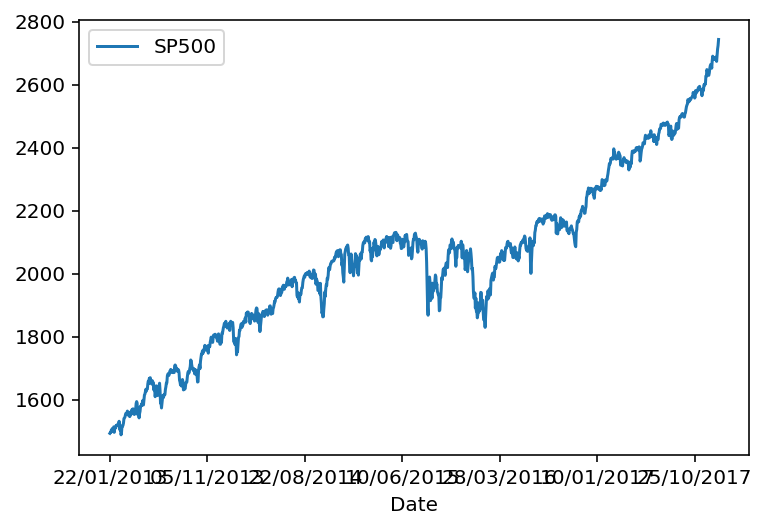

In [87]:
# Load the provided S&P 500 data

sp500_data = pd.read_csv('Jan 24 Exam 1 Data.csv', header=[0], index_col=[0])

# Display the first few rows of the dataframe
sp500_data.plot()



In [88]:
# summary stats of the data
sp500_data.describe()

,SP500
count,1250.000000
mean,2043.747544
std,273.440170
min,1487.849976
25%,1869.100006
50%,2052.630005
75%,2171.265075
max,2743.149902


In [89]:
#Calculate daily returns 
sp500_data['log_return_1d'] = np.log(1 + sp500_data.SP500.pct_change(1)).astype(float)

In [90]:
#Calculate 10-Day Forward Realized Return (r10d,t+10): For each day, compute the realized return from that day to 10 days ahead, computed ln(St+10/St)
sp500_data['log_return_10d'] = np.log(sp500_data['SP500'].shift(-10) / sp500_data['SP500'])

In [91]:
#Calculate Rolling Standard Deviation (σt):Compute the rolling standard deviation of the daily returns using a 21-day window.
sp500_data['21d_rolling_std'] = sp500_data['log_return_1d'].rolling(21).std()


In [92]:
# Factor for a 99% confidence interval
factor = norm.ppf(0.01)
factor

-2.3263478740408408

In [93]:
#Determine VaR: Calculate the 10-day VaR for each day using the formula provided: VaR10d,t =Factor × σt × SQRT(10)

sp500_data['VaR'] = -(sp500_data['21d_rolling_std'] * -factor * np.sqrt(10))

In [94]:
# Identify VaR Breaches:A VaR breach occurs when the realized return is less than the negative of the VaR (r10D,t+10 < VaR10D,t). 

sp500_data['breach'] = np.where(sp500_data['VaR']> sp500_data['log_return_10d'], 1, 0)

In [95]:
sp500_data.tail(30)

,SP500,log_return_1d,log_return_10d,21d_rolling_std,VaR,breach
Date,,,,,,
22/11/2017,2597.080078,-0.000751,0.015247,0.003740,-0.027515,0
24/11/2017,2602.419922,0.002054,0.018684,0.003557,-0.026168,0
27/11/2017,2601.419922,-0.000384,0.022265,0.003565,-0.026229,0
28/11/2017,2627.040039,0.009800,0.014012,0.003760,-0.027664,0
29/11/2017,2626.070068,-0.000369,0.013909,0.003658,-0.026909,0
30/11/2017,2647.580078,0.008158,0.001672,0.003979,-0.029274,0
01/12/2017,2642.219971,-0.002027,0.012633,0.004045,-0.029755,0
04/12/2017,2639.439941,-0.001053,0.019034,0.004068,-0.029930,0
05/12/2017,2629.570068,-0.003746,0.019545,0.004172,-0.030694,0


In [96]:
#Count and Percentage of Breaches: I have excluded days that have a NaN from the sample for the calculation similar to the tutorial
pct_breach = round(len(sp500_data[sp500_data['breach'] == 1].dropna())/len(sp500_data.dropna()) * 100,4)
print('The number of VaR breaches is {}. This is {} percent'.format(len(sp500_data[sp500_data['breach'] == 1]), pct_breach))


The number of VaR breaches is 25. This is 2.0509 percent


##### The number of VaR breaches is 25.
The number of VaR breaches is 25. This is 2.05% which is higher than the 1% given the 99% confidence interval aplied. For a 99% confidence level VaR, you would expect breaches only 1% of the time because the VaR is intended to provide a threshold that is breached by the worst 1% of cases. This model could be underestimating the level of risk or the market experienced more volatility during the period  than what would be considered "normal" based on historical data.  

In [97]:
#consecutiave breaches
sp500_data['consecutive_breach'] = np.where((sp500_data['breach'].shift(1) == 1) & (sp500_data['breach'] == 1), 1, 0)
consecutive_pct_breach = round((sp500_data['consecutive_breach'].sum())/len(sp500_data.dropna()) *100,4)
print('The number of consecutive VaR breaches is {}. This is {} percent'.format(len(sp500_data[sp500_data['consecutive_breach'] == 1]), consecutive_pct_breach))

The number of consecutive VaR breaches is 14. This is 1.1485 percent


##### The number of consecutive VaR breaches is 14.

The number of consecutive VaR breaches is 14. This is 1.1485%. This indicates that in 14 instances, a VaR breach was immediately followed by one or more additional breaches on subsequent days. Also, out of 25 breaches, more than half were followed by at least one other breach, suggesting that in this specific period, it was quite likely to have a consecutive breach after an initial breach. this is evidence of volatilitly clustering. 

## Plot the results

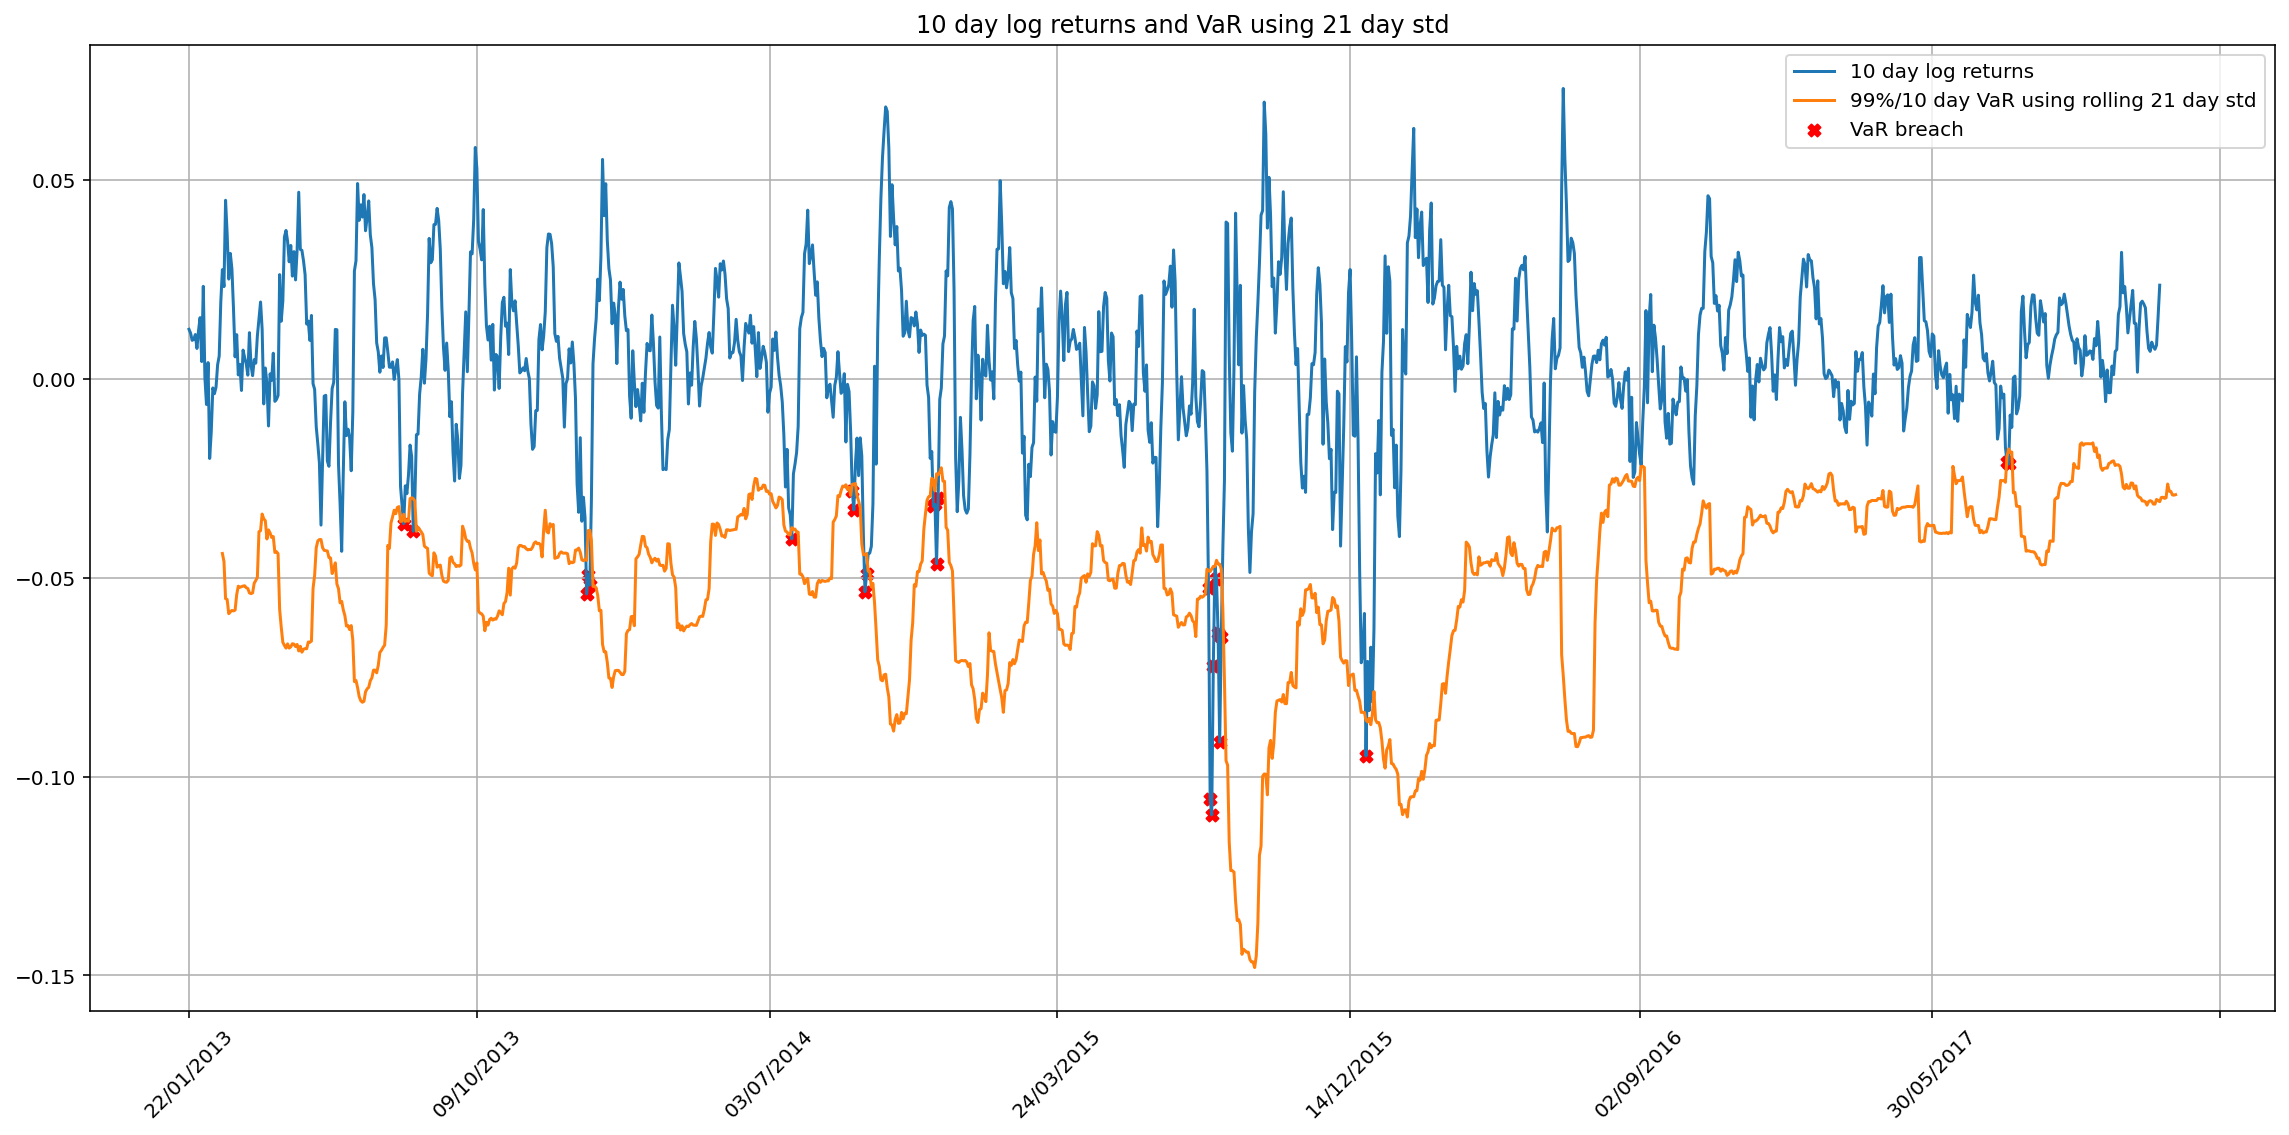

In [98]:
plt.figure(figsize=(16, 8))
plt.plot(sp500_data['log_return_10d'], label='10 day log returns')
plt.plot(sp500_data['VaR'], label='99%/10 day VaR using rolling 21 day std')
plt.scatter(sp500_data[sp500_data['breach'] == 1].index, sp500_data[sp500_data['breach'] == 1]['log_return_10d'], color='red', marker='X', label='VaR breach')
plt.legend()
plt.title('10 day log returns and VaR using 21 day std')
plt.grid(True)

# Set the x-axis to display dates clearly
ax = plt.gca()  # Get the current Axes instance
ax.xaxis.set_major_locator(mdates.AutoDateLocator())  

# Improve the tick labels for clarity
plt.xticks(fontsize=10, rotation=45)  # Rotate the labels for better visibility, adjust size as needed
plt.yticks(fontsize=10)

plt.tight_layout()  
plt.show()


The above plot of the S&P 500 index over time, highlights the points at which VaR breaches occurred. This plot is useful for identifying patterns or clusters of breaches over time, which might indicate periods of high volatility. A red X is used to identify breacheswhen the forward realised 10-day return is below the VaRt quantity.